# Examples of the possible outcomes of 4 [Bernoulli Trials](https://en.wikipedia.org/wiki/Bernoulli_trial)
 - [0,1,1,0]
 - [0,1,0,0]
 - [1,0,0,1]

This is the same thing, just using proper terminology. Remember that each coin has the same probability that it will land on heads, and different outcomes are possible.

# Analogy 1: Pulling red stones in a bag

This situation is analagous to, the following random experiment. Let's say there is a bag of red stones and green stones, and you sample 4 stones from this bag (with replacement). Let's say the proportion of red stones in the bag is 'p'. 

In that case, you will get outcomes like this something like:
 - [red, green, green, red]
 - [red, green, red, red]
 - [green, red, red, green]

## Imagine a _random experiment_ using the random variable that counts reds.

Imagine the red stones make up .37 of the population, and you do the following 4 times:
 0. Create a tally named `num_reds` and set it to zero.
 1. Take a stone, uniformly at random from the bag
 2. If it's red, increment `num_reds`: `num_reds += 1`.
 3. Go back and repeat steps 1 and 2 until you've done this for 4 stones.

`num_reds` is the number of red stones in your outcome.

In [1]:
# Set up `n` and `p`.
# notice that there is a natural "unpacking" behavior 
# that allows one to create two variables in one line

n, p = 4, .37 

### Exercise: The Old School Way

What is the probability distribution of `num_reds` in this random experiment? Graph it as well.

In [2]:
import itertools

outcomes = list(itertools.product(('red', 'green'), repeat=n))

In [3]:
def get_num_reds_from_outcome(outcome):
    """Return the number of red stones in the outcome"""
    num_reds = 0
    for stone_color in outcome:
        if stone_color == 'red':
            num_reds += 1
    return num_reds

In [4]:
def get_probability_from_outcome(outcome, red_probability=p):
    """Return probability of outcome.
    
    Since the probability of reds is the same each time, because we're sampling
    """
    total_probability = 1
    for stone_color in outcome:
        if stone_color == 'red':
            multiplier = red_probability
        else:
            multiplier = 1-red_probability
        total_probability *= multiplier
    return total_probability

print("Examples:")
for outcome in outcomes[:10]:
    print("The following outcome has", get_num_reds_from_outcome(outcome), "reds",
          "and has probability", f'{get_probability_from_outcome(outcome):.4f}',
          "chance of occuring:", outcome)

Examples:
The following outcome has 4 reds and has probability 0.0187 chance of occuring: ('red', 'red', 'red', 'red')
The following outcome has 3 reds and has probability 0.0319 chance of occuring: ('red', 'red', 'red', 'green')
The following outcome has 3 reds and has probability 0.0319 chance of occuring: ('red', 'red', 'green', 'red')
The following outcome has 2 reds and has probability 0.0543 chance of occuring: ('red', 'red', 'green', 'green')
The following outcome has 3 reds and has probability 0.0319 chance of occuring: ('red', 'green', 'red', 'red')
The following outcome has 2 reds and has probability 0.0543 chance of occuring: ('red', 'green', 'red', 'green')
The following outcome has 2 reds and has probability 0.0543 chance of occuring: ('red', 'green', 'green', 'red')
The following outcome has 1 reds and has probability 0.0925 chance of occuring: ('red', 'green', 'green', 'green')
The following outcome has 3 reds and has probability 0.0319 chance of occuring: ('green', 'red

In [5]:
# Produce probability distribution without a Pandas DataFrame
num_reds_to_probability = {num:0 for num in range(n + 1)}
for outcome in outcomes:
    num_reds = get_num_reds_from_outcome(outcome)
    probability = get_probability_from_outcome(outcome)
    num_reds_to_probability[num_reds] += probability
print(f"Probability Distribution, n={n}, p={p}:")
for num_reds, probability in num_reds_to_probability.items():
    print(f" --> There is a {probability:.4f} chance of seeing {num_reds} reds.")

Probability Distribution, n=4, p=0.37:
 --> There is a 0.1575 chance of seeing 0 reds.
 --> There is a 0.3701 chance of seeing 1 reds.
 --> There is a 0.3260 chance of seeing 2 reds.
 --> There is a 0.1276 chance of seeing 3 reds.
 --> There is a 0.0187 chance of seeing 4 reds.


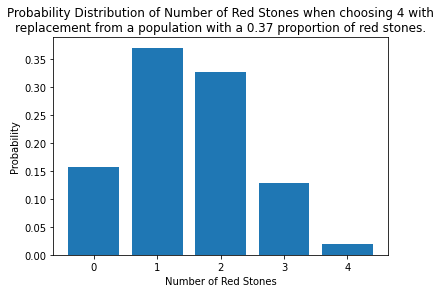

In [6]:
# Graph
import matplotlib.pyplot as plt

plt.bar(num_reds_to_probability.keys(), num_reds_to_probability.values())
plt.title(f"Probability Distribution of Number of Red Stones when choosing {n} with\n"
          f"replacement from a population with a {p} proportion of red stones.")
plt.xlabel("Number of Red Stones")
plt.ylabel("Probability")
plt.show()

### Exercise: With Pandas, the power of tabular data manipulation

What is the probability distribution of `num_reds` in this random experiment? Graph it as well.

In [7]:
# Put outcomes in a DataFrame
import pandas as pd

outcomes = itertools.product(('red', 'green'), repeat=n)

outcomes_df = pd.DataFrame(data=outcomes, columns=(f'color_{num}' for num in range(1, n + 1)))
outcomes_df.head()

,color_1,color_2,color_3,color_4
0,red,red,red,red
1,red,red,red,green
2,red,red,green,red
3,red,red,green,green
4,red,green,red,red


In [8]:
red_mask = outcomes_df == 'red'
red_mask.head()

,color_1,color_2,color_3,color_4
0,True,True,True,True
1,True,True,True,False
2,True,True,False,True
3,True,True,False,False
4,True,False,True,True


In [9]:
# note axis 1, and that we are summing booleans
outcomes_df['num_reds'] = red_mask.sum(axis=1)
outcomes_df.head()

,color_1,color_2,color_3,color_4,num_reds
0,red,red,red,red,4
1,red,red,red,green,3
2,red,red,green,red,3
3,red,red,green,green,2
4,red,green,red,red,3


In [10]:
# So if we have 3 reds, we do p * p * p * (1-p)
# If we have 2 reds, we do p * p * (1-p) * (1-p)
# The order that we are applying these muliplications doesn't matter
# Because multiplication is commutative
outcomes_df['probability'] = p**outcomes_df['num_reds']*(1-p)**(n-outcomes_df['num_reds'])
outcomes_df.head()

,color_1,color_2,color_3,color_4,num_reds,probability
0,red,red,red,red,4,0.018742
1,red,red,red,green,3,0.031911
2,red,red,green,red,3,0.031911
3,red,red,green,green,2,0.054336
4,red,green,red,red,3,0.031911


In [11]:
# Group by num_reds
probability_distribution_df = outcomes_df.groupby('num_reds')[['probability']].sum()
probability_distribution_df

,probability
num_reds,
0,0.157530
1,0.370070
2,0.326014
3,0.127646
4,0.018742


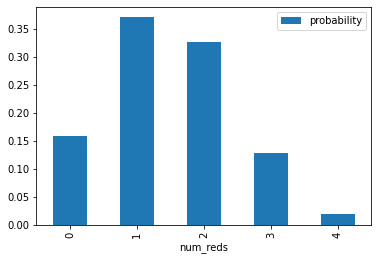

In [12]:
# Graph
probability_distribution_df.plot.bar()
plt.show()

### Exercise: With SciPy, even more straightforward

What is the probability distribution of `num_reds` in this random experiment? Graph it as well.

The probability of getting 0 red stones is 0.1575
The probability of getting 1 red stones is 0.3701
The probability of getting 2 red stones is 0.3260
The probability of getting 3 red stones is 0.1276
The probability of getting 4 red stones is 0.0187


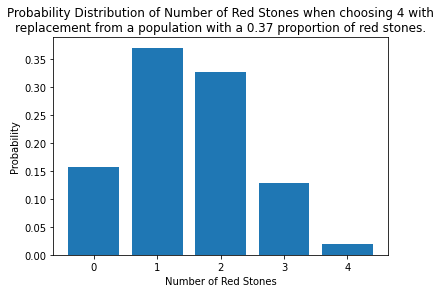

In [13]:
from scipy.stats import binom
import numpy as np

rv = binom(n, p)
nums = np.arange(n+1)

for num in nums:
    print(f"The probability of getting {num} red stones is "
          f"{rv.pmf(num):.4f}")

plt.bar(nums, rv.pmf(nums))
plt.title(f"Probability Distribution of Number of Red Stones when choosing {n} with\n"
          f"replacement from a population with a {p} proportion of red stones.")
plt.xlabel("Number of Red Stones")
plt.ylabel("Probability")
plt.show()